In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r'C:\Users\Lenovo\Downloads\archive (2)\fitness_class_2212.csv')

In [3]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10,Fri,AM,HIIT,0
1496,1497,29,89.55,2,Mon,AM,Strength,0
1497,1498,9,87.38,4,Tue,AM,HIIT,0
1498,1499,34,68.64,14,Sun,AM,Aqua,0


In [4]:
((df.isnull().sum())/len(df))*100

booking_id          0.000000
months_as_member    0.000000
weight              1.333333
days_before         0.000000
day_of_week         0.000000
time                0.000000
category            0.000000
attended            0.000000
dtype: float64

In [5]:
df=df.dropna()

In [6]:
((df.isnull().sum())/len(df))*100

booking_id          0.0
months_as_member    0.0
weight              0.0
days_before         0.0
day_of_week         0.0
time                0.0
category            0.0
attended            0.0
dtype: float64

In [7]:
df.shape

(1480, 8)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1480 non-null   int64  
 1   months_as_member  1480 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1480 non-null   object 
 4   day_of_week       1480 non-null   object 
 5   time              1480 non-null   object 
 6   category          1480 non-null   object 
 7   attended          1480 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 104.1+ KB


In [25]:
df.days_before.value_counts()

10.0    290
2.0     197
8.0     190
12.0    177
14.0    170
4.0     153
6.0      70
7.0      37
3.0      31
5.0      27
13.0     25
11.0     25
15.0     24
9.0      23
1.0       8
16.0      3
17.0      3
20.0      1
29.0      1
Name: days_before, dtype: int64

In [10]:
df=df.replace(to_replace=['Fri.','Monday','Wednesday'],value=['Fri','Mon','Wed'])

In [11]:
df.day_of_week.value_counts()

Fri    303
Thu    235
Mon    225
Sun    211
Sat    200
Tue    192
Wed    114
Name: day_of_week, dtype: int64

In [12]:
df['days_before'] =pd.to_numeric(df['days_before'],errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1480 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1480 non-null   int64  
 1   months_as_member  1480 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1455 non-null   float64
 4   day_of_week       1480 non-null   object 
 5   time              1480 non-null   object 
 6   category          1480 non-null   object 
 7   attended          1480 non-null   int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 104.1+ KB


In [14]:
((df.isnull().sum())/len(df))*100

booking_id          0.000000
months_as_member    0.000000
weight              0.000000
days_before         1.689189
day_of_week         0.000000
time                0.000000
category            0.000000
attended            0.000000
dtype: float64

In [15]:
df=df.dropna()

In [16]:
df.shape

(1455, 8)

In [17]:
status = pd.get_dummies(df[['day_of_week','category']],drop_first=True)
df=pd.concat([df,status],axis=1)

In [18]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,1,17,79.56,8.0,Wed,PM,Strength,0,0,0,0,0,0,1,0,0,0,1,0
1,2,10,79.01,2.0,Mon,AM,HIIT,0,1,0,0,0,0,0,0,0,1,0,0
2,3,16,74.53,14.0,Sun,AM,Strength,0,0,0,1,0,0,0,0,0,0,1,0
3,4,5,86.12,10.0,Fri,AM,Cycling,0,0,0,0,0,0,0,0,1,0,0,0
4,5,15,69.29,8.0,Thu,AM,HIIT,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10.0,Fri,AM,HIIT,0,0,0,0,0,0,0,0,0,1,0,0
1496,1497,29,89.55,2.0,Mon,AM,Strength,0,1,0,0,0,0,0,0,0,0,1,0
1497,1498,9,87.38,4.0,Tue,AM,HIIT,0,0,0,0,0,1,0,0,0,1,0,0
1498,1499,34,68.64,14.0,Sun,AM,Aqua,0,0,0,1,0,0,0,1,0,0,0,0


In [19]:
varlist =  ['time']
def binary_map(x):
    return x.map({'AM': 1, "PM": 0})
df[varlist] = df[varlist].apply(binary_map)


In [20]:
df

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,1,17,79.56,8.0,Wed,0,Strength,0,0,0,0,0,0,1,0,0,0,1,0
1,2,10,79.01,2.0,Mon,1,HIIT,0,1,0,0,0,0,0,0,0,1,0,0
2,3,16,74.53,14.0,Sun,1,Strength,0,0,0,1,0,0,0,0,0,0,1,0
3,4,5,86.12,10.0,Fri,1,Cycling,0,0,0,0,0,0,0,0,1,0,0,0
4,5,15,69.29,8.0,Thu,1,HIIT,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10.0,Fri,1,HIIT,0,0,0,0,0,0,0,0,0,1,0,0
1496,1497,29,89.55,2.0,Mon,1,Strength,0,1,0,0,0,0,0,0,0,0,1,0
1497,1498,9,87.38,4.0,Tue,1,HIIT,0,0,0,0,0,1,0,0,0,1,0,0
1498,1499,34,68.64,14.0,Sun,1,Aqua,0,0,0,1,0,0,0,1,0,0,0,0


In [21]:
df.drop(['day_of_week','category'],axis=1,inplace=True)

In [22]:
df

,booking_id,months_as_member,weight,days_before,time,attended,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed,category_Aqua,category_Cycling,category_HIIT,category_Strength,category_Yoga
0,1,17,79.56,8.0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,10,79.01,2.0,1,0,1,0,0,0,0,0,0,0,1,0,0
2,3,16,74.53,14.0,1,0,0,0,1,0,0,0,0,0,0,1,0
3,4,5,86.12,10.0,1,0,0,0,0,0,0,0,0,1,0,0,0
4,5,15,69.29,8.0,1,0,0,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1496,21,79.51,10.0,1,0,0,0,0,0,0,0,0,0,1,0,0
1496,1497,29,89.55,2.0,1,0,1,0,0,0,0,0,0,0,0,1,0
1497,1498,9,87.38,4.0,1,0,0,0,0,0,1,0,0,0,1,0,0
1498,1499,34,68.64,14.0,1,0,0,0,1,0,0,0,1,0,0,0,0


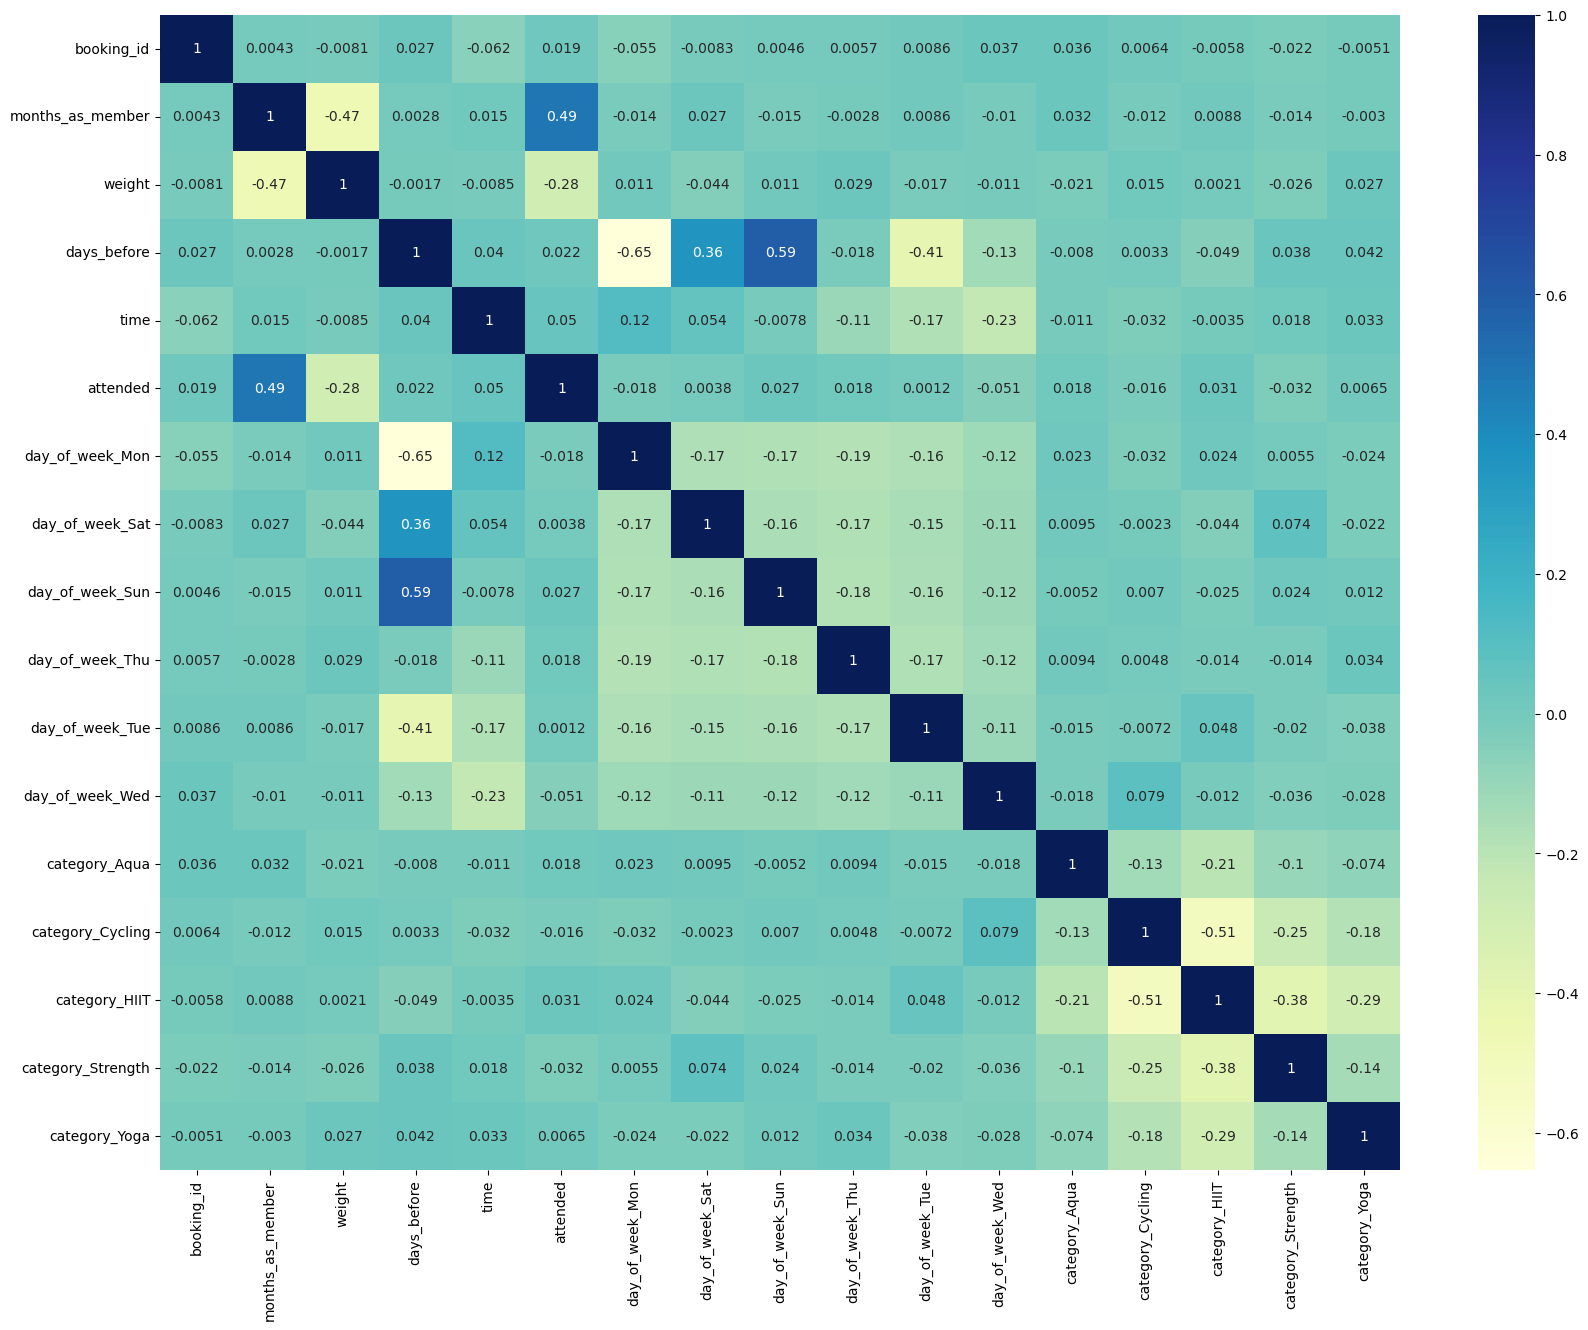

In [24]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [26]:
df.drop('days_before',axis=1,inplace=True)

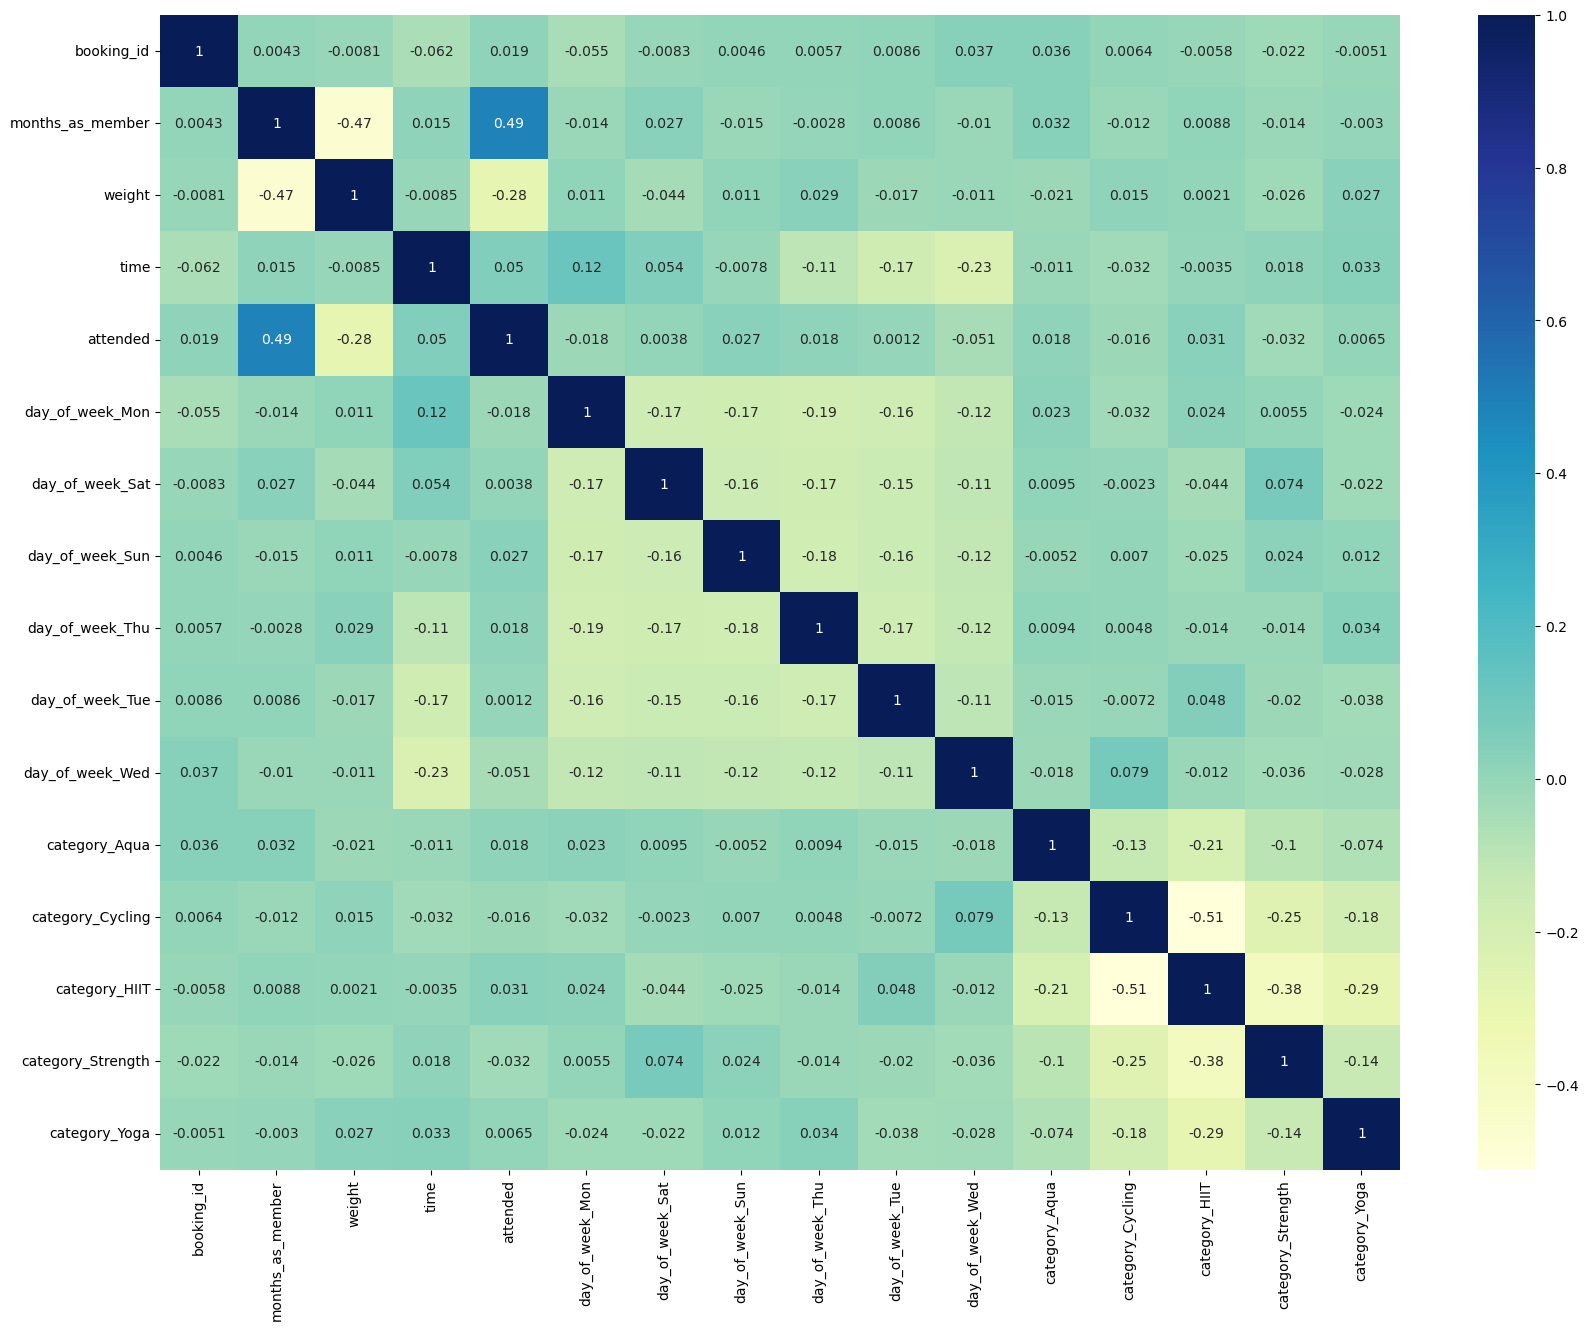

In [27]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [28]:
X=df.drop(['attended'],axis=1)
y=df['attended']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [30]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [31]:
logreg.fit(X_train,y_train)

C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
y_pred=logreg.predict(X_test)

In [33]:
from sklearn import metrics

In [34]:
confusion=metrics.confusion_matrix(y_test,y_pred)
print(confusion)

[[267  28]
 [ 84  58]]


In [35]:
print(metrics.accuracy_score(y_test,y_pred))

0.7437070938215103


In [36]:
from sklearn.svm import SVC

In [37]:
svm_classifier=SVC(kernel='linear',C=1.0)

In [38]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)


In [39]:
svm_classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [41]:
svm_pred=svm_classifier.predict(X_test)

In [42]:
confusion=metrics.confusion_matrix(y_test,svm_pred)
print(confusion)

[[269  26]
 [ 84  58]]


In [43]:
print(metrics.accuracy_score(y_test,svm_pred))

0.7482837528604119
